## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu Mar  7 09:42:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

![YOLO Timeline](https://drive.google.com/uc?export=view&id=1JFkBbLixZAADzoOX8UsYj8rFVLdj3jGd)

[YOLO BASICS EXPLAINED](https://medium.com/analytics-vidhya/yolo-explained-5b6f4564f31)

[YOLOv5](https://sh-tsang.medium.com/brief-review-yolov5-for-object-detection-84cc6c6a0e3a)

[YOLOV8](https://medium.com/@sohaib.zafar522/unleashing-the-power-of-yolo-v8-a-breakdown-of-its-working-principle-and-evolution-14a98d1feedc)

[YOLO PROGRESS OVER TIME](https://viso.ai/deep-learning/yolov8-guide/)

![YOLO](https://drive.google.com/uc?export=view&id=1Tf2gBeQiO54MxTEeowYYCN9japFxMbEu)

![IOU](https://drive.google.com/uc?export=view&id=1aV0y67f9NyX60mh0QcMSohTb9iY3VIKs)

![IOU](https://drive.google.com/uc?export=view&id=1yQExoX2xK535lCkEC6kzrBPckw5_cUCY)

![IOU](https://drive.google.com/uc?export=view&id=1JUw06Y_cUStNtWEsCTG2ygjTmsFrEP3o)

[YOLOV8 GUIDE](https://viso.ai/deep-learning/yolov8-guide/)

# How to Train YOLOv8 on a Custom Dataset
---

<div align="center">

  <a href="https://ultralytics.com/yolov8" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [हिन्दी](https://docs.ultralytics.com/hi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://console.paperspace.com/github/ultralytics/ultralytics"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"/></a>
  <a href="https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov8"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>

Welcome to the Ultralytics YOLOv8 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLOv8</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. This notebook serves as the starting point for exploring the various resources available to help you get started with YOLOv8 and understand its features and capabilities.

YOLOv8 models are fast, accurate, and easy to use, making them ideal for various object detection and image segmentation tasks. They can be trained on large datasets and run on diverse hardware platforms, from CPUs to GPUs.

We hope that the resources in this notebook will help you get the most out of YOLOv8. Please browse the YOLOv8 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


# 1. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [ ]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 6.23M/6.23M [00:00<00:00, 75.6MB/s]
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 165k/165k [00:00<00:00, 6.79MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 94.7ms
Speed: 13.3ms preprocess, 94.7ms inference, 648.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


# 2. Val
Validate a model's accuracy on the [COCO](https://docs.ultralytics.com/datasets/detect/coco/) dataset's `val` or `test` splits. The latest YOLOv8 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used. See [YOLOv8 Val Docs](https://docs.ultralytics.com/modes/val/) for more information.

In [ ]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:05<00:00, 163MB/s]


In [ ]:
# Validate YOLOv8n on COCO8 val
!yolo val model=yolov8n.pt data=coco8.yaml

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Dataset 'coco8.yaml' images not found ⚠️, missing path '/content/datasets/coco8/images/val'
100% 433k/433k [00:00<00:00, 9.78MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100% 25/25 [00:00<00:00, 1645.39file/s]
Dataset download success ✅ (1.0s), saved to /content/datasets

100% 755k/755k [00:00<00:00, 16.3MB/s]
val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<00:00, 338.03it/s]
val: New cache created: /content/datasets/coco8/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:02<00:00,  2.44s/it]
                   all          4         17      0.621      0.833      0.888       0.63
                person          4         10      0.721        0.5      0.519      0.269

# 3. Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>

Train YOLOv8 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLOv8 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [ ]:
# #@title Select YOLOv8 🚀 logger {run: 'auto'}
# logger = 'Comet' #@param ['Comet', 'TensorBoard']

# if logger == 'Comet':
#   %pip install -q comet_ml
#   import comet_ml; comet_ml.init()
# elif logger == 'TensorBoard':
#   %load_ext tensorboard
#   %tensorboard --logdir .

In [ ]:
# Train YOLOv8n on COCO8 for 3 epochs
!yolo train model=yolov8n.pt data=coco8.yaml epochs=3 imgsz=640

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

# 4. Export

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://docs.ultralytics.com/integrations/onnx/) or [OpenVINO](https://docs.ultralytics.com/integrations/openvino/) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://docs.ultralytics.com/integrations/tensorrt/) for up to 5x GPU speedup.

| Format                                                             | `format` Argument | Model                     | Metadata | Arguments                                           |
|--------------------------------------------------------------------|-------------------|---------------------------|----------|-----------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                    | -                 | `yolov8n.pt`              | ✅        | -                                                   |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)            | `torchscript`     | `yolov8n.torchscript`     | ✅        | `imgsz`, `optimize`                                 |
| [ONNX](https://onnx.ai/)                                           | `onnx`            | `yolov8n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`     |
| [OpenVINO](https://docs.openvino.ai/)                              | `openvino`        | `yolov8n_openvino_model/` | ✅        | `imgsz`, `half`, `int8`                             |
| [TensorRT](https://developer.nvidia.com/tensorrt)                  | `engine`          | `yolov8n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace` |
| [CoreML](https://github.com/apple/coremltools)                     | `coreml`          | `yolov8n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`                      |
| [TF SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`     | `yolov8n_saved_model/`    | ✅        | `imgsz`, `keras`, `int8`                            |
| [TF GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`              | `yolov8n.pb`              | ❌        | `imgsz`                                             |
| [TF Lite](https://www.tensorflow.org/lite)                         | `tflite`          | `yolov8n.tflite`          | ✅        | `imgsz`, `half`, `int8`                             |
| [TF Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`         | `yolov8n_edgetpu.tflite`  | ✅        | `imgsz`                                             |
| [TF.js](https://www.tensorflow.org/js)                             | `tfjs`            | `yolov8n_web_model/`      | ✅        | `imgsz`, `half`, `int8`                             |
| [PaddlePaddle](https://github.com/PaddlePaddle)                    | `paddle`          | `yolov8n_paddle_model/`   | ✅        | `imgsz`                                             |
| [NCNN](https://github.com/Tencent/ncnn)                            | `ncnn`            | `yolov8n_ncnn_model/`     | ✅        | `imgsz`, `half`                                     |


In [ ]:
!yolo export model=yolov8n.pt format=torchscript

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

TorchScript: starting export with torch 2.1.0+cu121...
TorchScript: export success ✅ 1.9s, saved as 'yolov8n.torchscript' (12.4 MB)

Export complete (3.7s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolov8n.torchscript imgsz=640 data=coco.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


# 5. Python Usage

YOLOv8 was reimagined using Python-first principles for the most seamless Python YOLO experience yet. YOLOv8 models can be loaded from a trained checkpoint or created from scratch. Then methods are used to train, val, predict, and export the model. See detailed Python usage examples in the [YOLOv8 Python Docs](https://docs.ultralytics.com/usage/python/).

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='coco128.yaml', epochs=3)  # train the model
results = model.val()  # evaluate model performance on the validation set
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
results = model.export(format='onnx')  # export the model to ONNX format

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 6.66M/6.66M [00:00<00:00, 205MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 2233.32file/s]

Dataset download success ✅ (2.7s), saved to /content/datasets




                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1992.79it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3       2.8G      1.152      1.595      1.249        228        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        128        929      0.658      0.513      0.591      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3       2.6G      1.142      1.376      1.218        151        640: 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]


                   all        128        929      0.652      0.538      0.605      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.55G       1.15      1.313      1.226        164        640: 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        128        929      0.655      0.549      0.626      0.463



3 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.97s/it]


                   all        128        929       0.66      0.546      0.625      0.462
                person        128        254      0.785      0.673      0.767      0.551
               bicycle        128          6      0.559      0.333       0.31      0.273
                   car        128         46      0.663      0.217      0.282      0.183
            motorcycle        128          5      0.831      0.988      0.928      0.749
              airplane        128          6      0.673      0.667      0.913      0.692
                   bus        128          7      0.518      0.714       0.72      0.601
                 train        128          3      0.524      0.667      0.806      0.752
                 truck        128         12          1       0.41      0.499      0.298
                  boat        128          6      0.293      0.167      0.394      0.241
         traffic light        128         14      0.668      0.214      0.206      0.129
             stop sig

val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]


                   all        128        929      0.657      0.552      0.627      0.464
                person        128        254      0.801      0.682      0.775      0.551
               bicycle        128          6      0.558      0.333      0.318       0.28
                   car        128         46      0.661      0.217      0.277      0.183
            motorcycle        128          5      0.831      0.988      0.928      0.749
              airplane        128          6      0.669      0.667      0.913      0.692
                   bus        128          7      0.505      0.714      0.719      0.601
                 train        128          3      0.524      0.667      0.806      0.752
                 truck        128         12          1      0.411        0.5      0.298
                  boat        128          6      0.301      0.167      0.359      0.239
         traffic light        128         14      0.666      0.214      0.206      0.129
             stop sig

100%|██████████| 476k/476k [00:00<00:00, 101MB/s]

image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 18.2ms
Speed: 4.5ms preprocess, 18.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)


Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 213.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.0s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 9.8s, saved as 'runs/detect/train2/weights/best.onnx' (12.2 MB)

Export complete (11.4s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train2/weights/best.onnx imgsz=640 data=/usr/local/lib/python3.10/dist-p

# 6. Tasks

YOLOv8 can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/). See [YOLOv8 Tasks Docs](https://docs.ultralytics.com/tasks/) for more information.

<br><img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">


## 1. Detection

YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. `yolov8n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detect/) for full details.


In [ ]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
model.train(data='coco128.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg', save=True)  # predict on an image

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 6.66M/6.66M [00:00<00:00, 79.0MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 3493.44file/s]

Dataset download success ✅ (1.0s), saved to /content/datasets




                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1997.29it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3       2.8G      1.152      1.595      1.249        228        640: 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]

                   all        128        929      0.663      0.526      0.598      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3       2.6G      1.142      1.376      1.218        151        640: 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        128        929      0.683      0.536      0.615      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.55G       1.15      1.313      1.226        164        640: 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        128        929      0.674      0.547      0.632      0.468



3 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.24s/it]


                   all        128        929      0.675      0.547      0.632      0.467
                person        128        254      0.796      0.669      0.767      0.548
               bicycle        128          6      0.581      0.333      0.319       0.28
                   car        128         46       0.72      0.217      0.278       0.18
            motorcycle        128          5      0.825      0.947      0.962      0.771
              airplane        128          6      0.682      0.667      0.913      0.692
                   bus        128          7      0.634      0.714      0.719      0.609
                 train        128          3      0.532      0.667      0.806      0.752
                 truck        128         12          1      0.392      0.512      0.314
                  boat        128          6      0.302      0.167      0.394      0.236
         traffic light        128         14      0.678      0.214      0.205      0.129
             stop sig

100%|██████████| 476k/476k [00:00<00:00, 11.8MB/s]

image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 10.1ms
Speed: 2.2ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

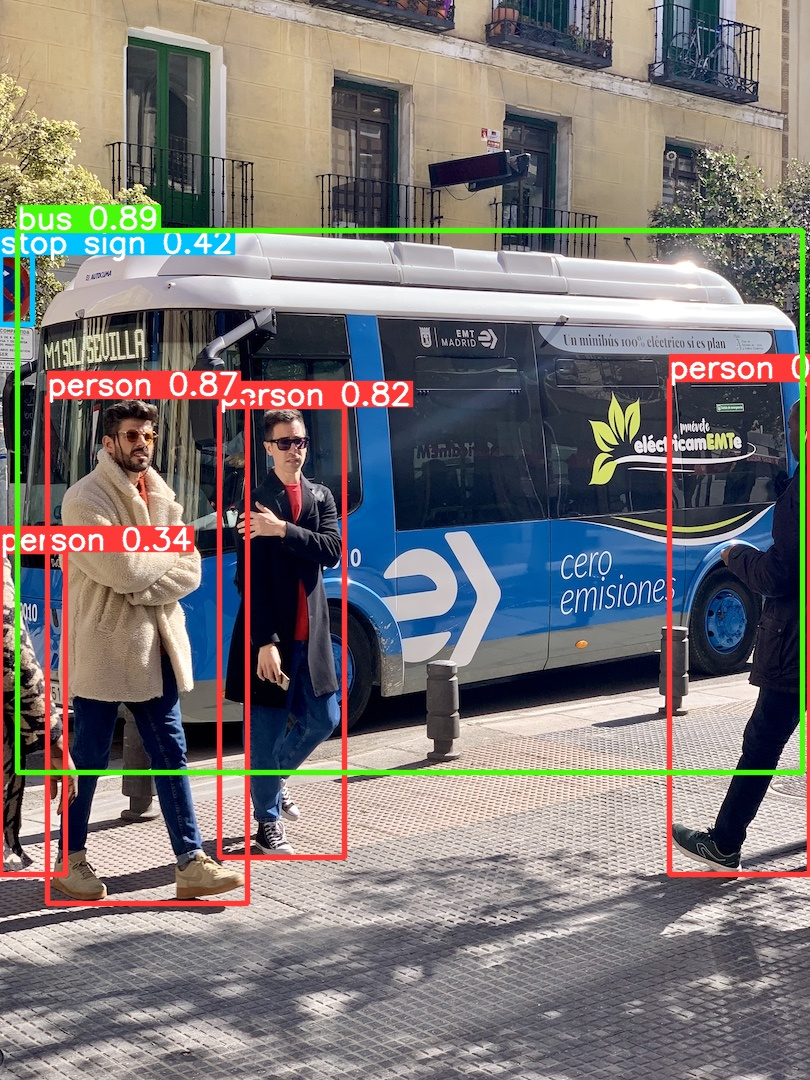

In [ ]:
from IPython.display import Image

image_path = "runs/detect/train2/bus.jpg"
Image(filename=image_path)

## 2. Segmentation

YOLOv8 _segmentation_ models use the `-seg` suffix, i.e. `yolov8n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segment/) for full details.


In [ ]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='coco128-seg.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg', save=True)  # predict on an image

100%|██████████| 6.73M/6.73M [00:00<00:00, 90.2MB/s]


Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=coco128-seg.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 6.79M/6.79M [00:00<00:00, 83.0MB/s]
Unzipping /content/datasets/coco128-seg.zip to /content/datasets/coco128-seg...: 100%|██████████| 263/263 [00:00<00:00, 3629.13file/s]

Dataset download success ✅ (1.0s), saved to /content/datasets


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               


  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /content/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1459.05it/s]

train: New cache created: /content/datasets/coco128-seg/labels/train2017.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3      3.78G      1.093      2.596      1.577      1.176        236        640: 100%|██████████| 8/8 [00:09<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        128        929      0.688      0.467      0.573      0.414       0.52      0.528      0.536      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/3      3.65G      1.086      2.506      1.369      1.147        156        640: 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        128        929      0.556      0.577       0.59      0.429      0.548       0.55      0.553      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3      3.55G      1.067      2.591       1.27      1.144        171        640: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        128        929      0.564      0.589      0.596      0.433      0.572      0.539      0.556      0.368



3 epochs completed in 0.015 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 7.1MB
Optimizer stripped from runs/segment/train/weights/best.pt, 7.1MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]


                   all        128        929      0.563       0.59      0.597      0.433      0.573       0.54      0.555      0.368
                person        128        254      0.727       0.74      0.779      0.552      0.726      0.689      0.735      0.404
               bicycle        128          6      0.518      0.167       0.44       0.28          1      0.318      0.496      0.274
                   car        128         46      0.491      0.239      0.241      0.147      0.522      0.214      0.228      0.104
            motorcycle        128          5      0.707          1      0.962      0.748      0.757          1      0.962      0.514
              airplane        128          6      0.656      0.959      0.893      0.688      0.534      0.767      0.706      0.534
                   bus        128          7      0.561      0.714       0.72      0.572      0.569      0.714       0.72      0.554
                 train        128          3      0.594      0.981   

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

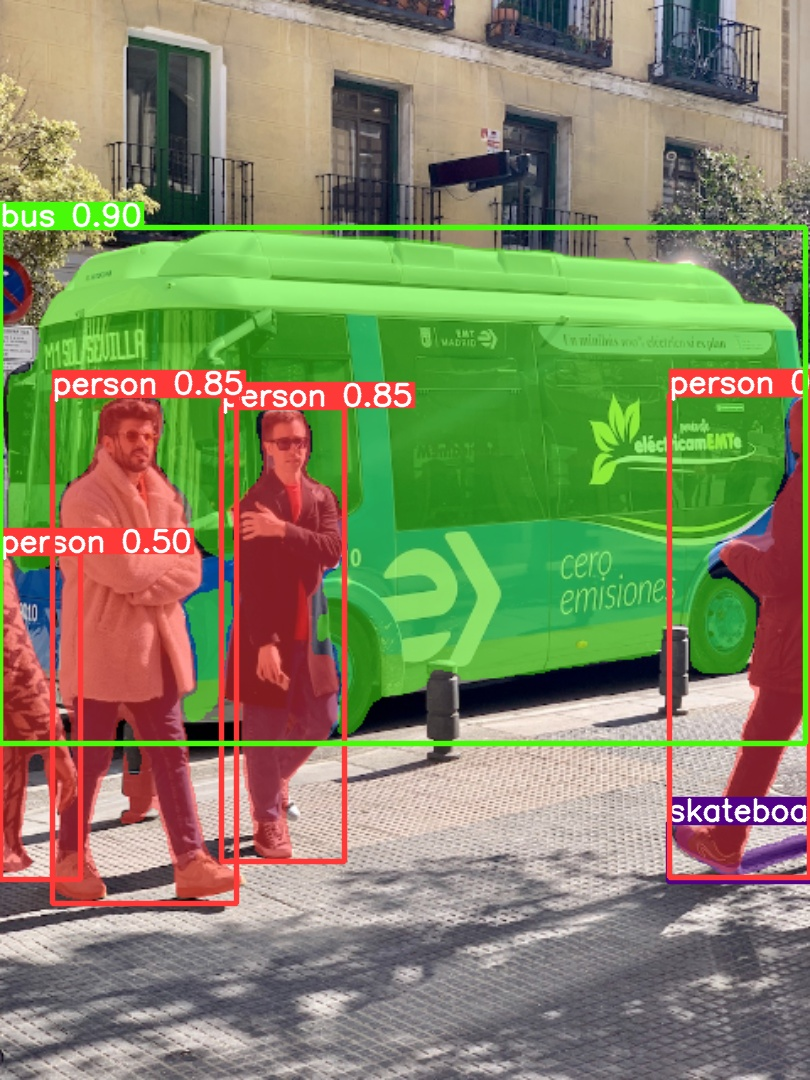

In [ ]:
from IPython.display import Image

image_path = "runs/segment/train2/bus.jpg"
Image(filename=image_path)

## 3. Classification

YOLOv8 _classification_ models use the `-cls` suffix, i.e. `yolov8n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


In [ ]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='mnist160', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg', save=True)  # predict on an image

100%|██████████| 5.30M/5.30M [00:00<00:00, 65.8MB/s]


Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=mnist160, epochs=3, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 70.0k/70.0k [00:00<00:00, 6.34MB/s]
Unzipping /content/datasets/mnist160.zip to /content/datasets/mnist160...: 100%|██████████| 184/184 [00:00<00:00, 9424.83file/s]

Dataset download success ✅ (0.5s), saved to /content/datasets/mnist160

train: /content/datasets/mnist160/train... found 80 images in 10 classes ✅ 
val: None...
test: /content/datasets/mnist160/test... found 80 images in 10 classes ✅ 
Overriding model.yaml nc=1000 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  u

AMP: checks passed ✅


train: Scanning /content/datasets/mnist160/train... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 9369.08it/s]

train: New cache created: /content/datasets/mnist160/train.cache



val: Scanning /content/datasets/mnist160/test... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 8430.55it/s]

val: New cache created: /content/datasets/mnist160/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.61it/s]

                   all     0.0875      0.613



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.31it/s]

                   all      0.138       0.55



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.78it/s]


                   all      0.138      0.575

3 epochs completed in 0.001 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1447690 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/mnist160/train... found 80 images in 10 classes ✅ 
val: None...
test: /content/datasets/mnist160/test... found 80 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 12.57it/s]


                   all      0.138      0.575
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 224x224 9 0.20, 8 0.12, 6 0.12, 0 0.11, 5 0.09, 4.3ms
Speed: 8.5ms preprocess, 4.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/train2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
 obb: None
 orig_img: array([[[122, 148, 172],
         [120, 146, 170],
         [125, 153, 177],
         ...,
         [157, 170, 184],
         [158, 171, 185],
         [158, 171, 185]],
 
        [[127, 153, 177],
         [124, 150, 174],
         [127, 155, 179],
         ...,
         [158, 171, 185],
         [159, 172, 186],
         [159, 172, 186]],
 
        [[128, 154, 178],
         [126, 152, 176],
         [126, 154, 178],
         ...,
         [158, 171, 185],
         [158, 171, 185],
         [158, 171, 185]],
 
        ...,
 
        [[185, 185, 191],
         [182, 182, 188],
         [179, 179, 185],
         ...,
         [114, 107, 112],
         [115, 105, 111],
         [116, 106, 112]],
 
        [[157, 157, 163],
         [180, 180, 186],
         [185, 186, 190],


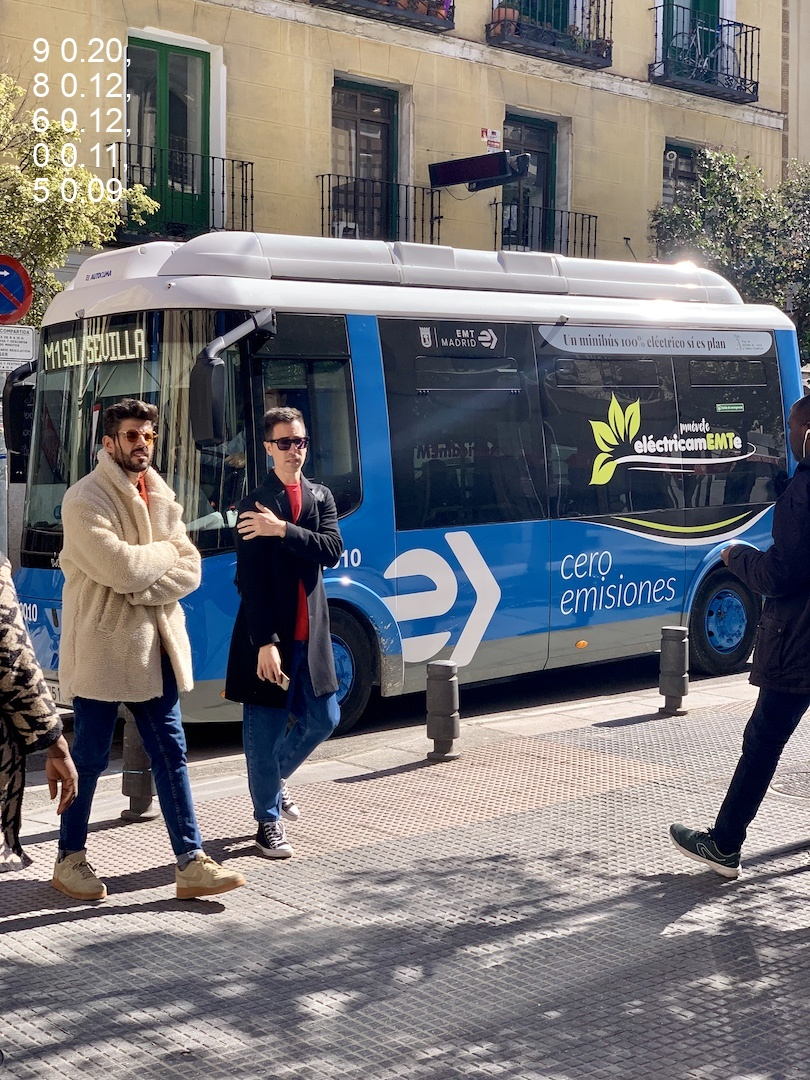

In [ ]:
from IPython.display import Image

image_path = "runs/classify/train2/bus.jpg"
Image(filename=image_path)

## 4. Pose

YOLOv8 _pose_ models use the `-pose` suffix, i.e. `yolov8n-pose.pt` and are pretrained on COCO Keypoints. See [Pose Docs](https://docs.ultralytics.com/tasks/pose/) for full details.

In [ ]:
# Load YOLOv8n-pose, train it on COCO8-pose for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')  # load a pretrained YOLOv8n pose model
model.train(data='coco8-pose.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg', save=True)  # predict on an image

100%|██████████| 6.51M/6.51M [00:00<00:00, 84.3MB/s]


Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=coco8-pose.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 334k/334k [00:00<00:00, 9.72MB/s]
Unzipping /content/datasets/coco8-pose.zip to /content/datasets/coco8-pose...: 100%|██████████| 27/27 [00:00<00:00, 4186.24file/s]

Dataset download success ✅ (0.9s), saved to /content/datasets


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1 

YOLOv8n-pose summary: 250 layers, 3295470 parameters, 3295454 gradients, 9.3 GFLOPs

Transferred 397/397 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/pose/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/datasets/coco8-pose/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1370.91it/s]

train: New cache created: /content/datasets/coco8-pose/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8-pose/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 478.13it/s]

val: New cache created: /content/datasets/coco8-pose/labels/val.cache


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.793G     0.8494      1.321     0.2222     0.4772      1.283         10        640: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all          4         14      0.919      0.929      0.907      0.685          1      0.619      0.652      0.366



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        2/3     0.749G      1.329      4.009     0.3685      1.029      1.376         14        640: 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all          4         14      0.919      0.929      0.907      0.687          1      0.628      0.652      0.366



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.747G      1.324      4.111     0.3871     0.9338      1.344         15        640: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all          4         14      0.918      0.929      0.907      0.685          1      0.636      0.652      0.366



3 epochs completed in 0.001 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/pose/train/weights/best.pt, 6.8MB

Validating runs/pose/train/weights/best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-pose summary (fused): 187 layers, 3289964 parameters, 0 gradients, 9.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]


                   all          4         14      0.919      0.929      0.907      0.687          1      0.625      0.652      0.366
Speed: 0.3ms preprocess, 7.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/pose/train

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 36.8ms
Speed: 2.2ms preprocess, 36.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/train2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[122, 148, 172],
         [120, 146, 170],
         [125, 153, 177],
         ...,
         [157, 170, 184],
         [158, 171, 185],
         [158, 171, 185]],
 
        [[127, 153, 177],
         [124, 150, 174],
         [127, 155, 179],
         ...,
         [158, 171, 185],
         [159, 172, 186],
         [159, 172, 186]],
 
        [[128, 154, 178],
         [126, 152, 176],
         [126, 154, 178],
         ...,
         [158, 171, 185],
         [158, 171, 185],
         [158, 171, 185]],
 
        ...,
 
        [[185, 185, 191],
         [182, 182, 188],
         [179, 179, 185],
         ...,
         [114, 107, 112],
         [115, 105, 111],
         [116, 106, 112]],
 
        [[157, 157, 163],
         [180, 180, 186],
         [185, 186,

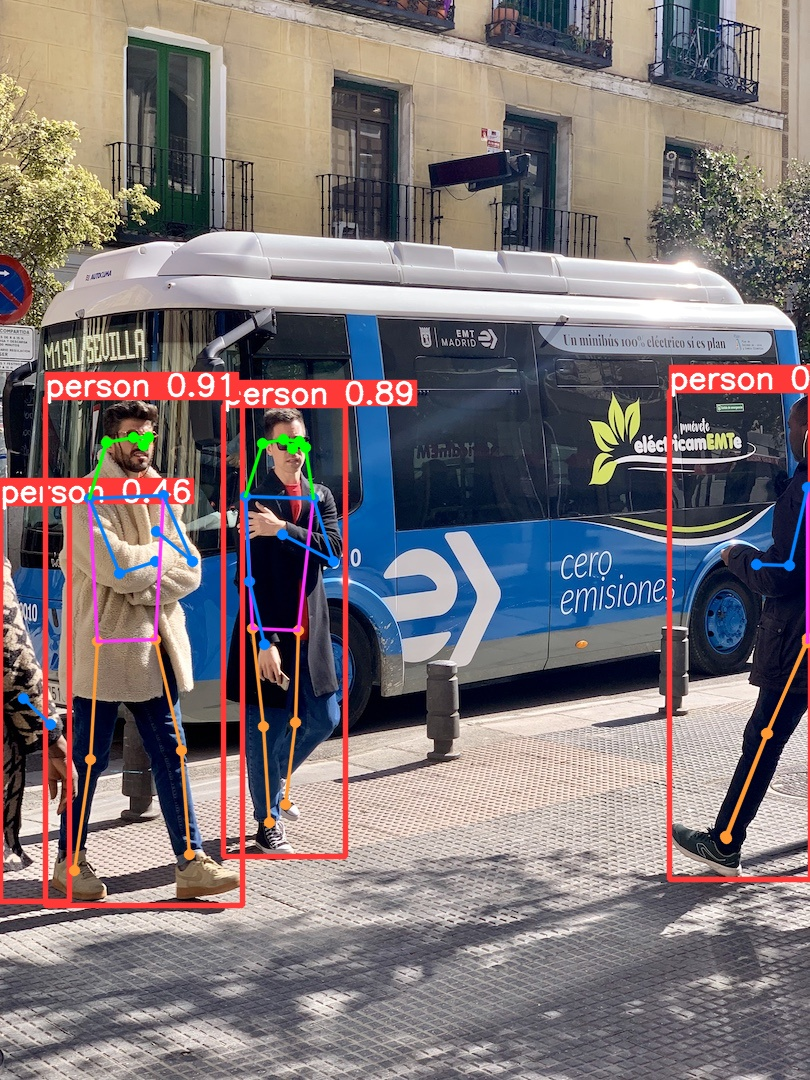

In [ ]:
from IPython.display import Image

image_path = "runs/pose/train2/bus.jpg"
Image(filename=image_path)

## 4. Oriented Bounding Boxes (OBB)

YOLOv8 _OBB_ models use the `-obb` suffix, i.e. `yolov8n-obb.pt` and are pretrained on the DOTA dataset. See [OBB Docs](https://docs.ultralytics.com/tasks/obb/) for full details.

In [ ]:
# Load YOLOv8n-obb, train it on DOTA8 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-obb.pt')  # load a pretrained YOLOv8n OBB model
model.train(data='dota8.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg', save=True)  # predict on an image

100%|██████████| 6.24M/6.24M [00:00<00:00, 76.3MB/s]


Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=dota8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 1.24M/1.24M [00:00<00:00, 23.8MB/s]
Unzipping /content/datasets/dota8.zip to /content/datasets/dota8...: 100%|██████████| 27/27 [00:00<00:00, 1871.62file/s]

Dataset download success ✅ (0.6s), saved to /content/datasets


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1 

YOLOv8n-obb summary: 250 layers, 3085440 parameters, 3085424 gradients, 8.5 GFLOPs

Transferred 397/397 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/obb/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/datasets/dota8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1272.83it/s]

train: New cache created: /content/datasets/dota8/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/dota8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 25003.30it/s]

val: New cache created: /content/datasets/dota8/labels/val.cache


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      1.83G      0.895     0.6293      1.672        301       1024: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all          4          8      0.835          1      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      1.67G     0.8603     0.5737      1.923        168       1024: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


                   all          4          8      0.843          1      0.995      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      1.55G      0.367      0.405     0.9731         37       1024: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all          4          8       0.84          1      0.995      0.743



3 epochs completed in 0.009 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 6.7MB
Optimizer stripped from runs/obb/train/weights/best.pt, 6.7MB

Validating runs/obb/train/weights/best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3080144 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


                   all          4          8      0.838          1      0.995      0.743
      baseball diamond          4          4      0.715          1      0.995      0.797
      basketball court          4          3      0.873          1      0.995      0.834
     soccer ball field          4          1      0.926          1      0.995      0.597
Speed: 0.6ms preprocess, 11.4ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs/obb/train

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 1024x768 79.4ms
Speed: 4.5ms preprocess, 79.4ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 768)
Results saved to runs/obb/train2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'plane', 1: 'ship', 2: 'storage tank', 3: 'baseball diamond', 4: 'tennis court', 5: 'basketball court', 6: 'ground track field', 7: 'harbor', 8: 'bridge', 9: 'large vehicle', 10: 'small vehicle', 11: 'helicopter', 12: 'roundabout', 13: 'soccer ball field', 14: 'swimming pool'}
 obb: ultralytics.engine.results.OBB object
 orig_img: array([[[122, 148, 172],
         [120, 146, 170],
         [125, 153, 177],
         ...,
         [157, 170, 184],
         [158, 171, 185],
         [158, 171, 185]],
 
        [[127, 153, 177],
         [124, 150, 174],
         [127, 155, 179],
         ...,
         [158, 171, 185],
         [159, 172, 186],
         [159, 172, 186]],
 
        [[128, 154, 178],
         [126, 152, 176],
         [126, 154, 178],
         ...,
         [158, 171, 185],
         [158, 171, 185],
         [158, 171, 185]],
 
        ...,
 
        [[185, 18

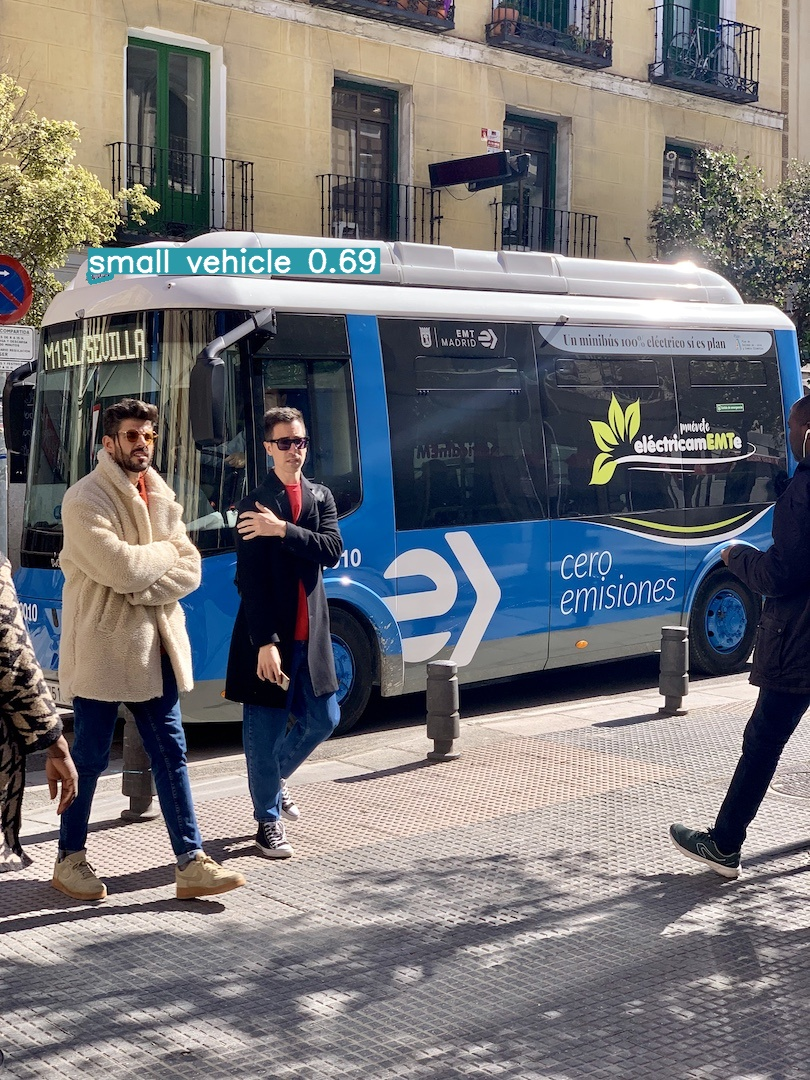

In [ ]:
from IPython.display import Image

image_path = "runs/obb/train2/bus.jpg"
Image(filename=image_path)

## Validate Multiple models on COCO dataset:


1.   n: nano
2.   s: small
3.   m: medium
4.   l: large
5.   x: extra large

In [ ]:
# Validate multiple models
for x in 'ns': #'nsmlx'
  !yolo val model=yolov8{x}.pt data=coco.yaml

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /content/datasets/coco/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:02<00:00, 2003.99it/s]
val: New cache created: /content/datasets/coco/labels/val2017.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 313/313 [01:06<00:00,  4.68it/s]
                   all       5000      36335      0.633      0.475      0.521      0.371
                person       5000      10777      0.754      0.673      0.745      0.514
               bicycle       5000        314      0.687      0.392      0.457      0.265
                   car       5000       1918      0.646      0.515      0.561      0.364
            motorcycle       5000        367       0.71       0.58      0.655      0.414
              airplane       5000        143      0.81

<!-- ##COCO classes:
{0: u'__background__',
 1: u'person',
 2: u'bicycle',
 3: u'car',
 4: u'motorcycle',
 5: u'airplane',
 6: u'bus',
 7: u'train',
 8: u'truck',
 9: u'boat',
 10: u'traffic light',
 11: u'fire hydrant',
 12: u'stop sign',
 13: u'parking meter',
 14: u'bench',
 15: u'bird',
 16: u'cat',
 17: u'dog',
 18: u'horse',
 19: u'sheep',
 20: u'cow',
 21: u'elephant',
 22: u'bear',
 23: u'zebra',
 24: u'giraffe',
 25: u'backpack',
 26: u'umbrella',
 27: u'handbag',
 28: u'tie',
 29: u'suitcase',
 30: u'frisbee',
 31: u'skis',
 32: u'snowboard',
 33: u'sports ball',
 34: u'kite',
 35: u'baseball bat',
 36: u'baseball glove',
 37: u'skateboard',
 38: u'surfboard',
 39: u'tennis racket',
 40: u'bottle',
 41: u'wine glass',
 42: u'cup',
 43: u'fork',
 44: u'knife',
 45: u'spoon',
 46: u'bowl',
 47: u'banana',
 48: u'apple',
 49: u'sandwich',
 50: u'orange',
 51: u'broccoli',
 52: u'carrot',
 53: u'hot dog',
 54: u'pizza',
 55: u'donut',
 56: u'cake',
 57: u'chair',
 58: u'couch',
 59: u'potted plant',
 60: u'bed',
 61: u'dining table',
 62: u'toilet',
 63: u'tv',
 64: u'laptop',
 65: u'mouse',
 66: u'remote',
 67: u'keyboard',
 68: u'cell phone',
 69: u'microwave',
 70: u'oven',
 71: u'toaster',
 72: u'sink',
 73: u'refrigerator',
 74: u'book',
 75: u'clock',
 76: u'vase',
 77: u'scissors',
 78: u'teddy bear',
 79: u'hair drier',
 80: u'toothbrush'} -->

## ULTRALYTICS YT DOCS PLAYLISTS

*   YOLOv8: https://youtube.com/playlist?list=PL1FZnkj4ad1PFJTjW4mWpHZhzgJinkNV0&si=abEspVxGaoPwgw_0

*   YOLOv5: https://youtube.com/playlist?list=PL1FZnkj4ad1NruSXeK4R7B4A8afizgGQM&si=abmE4Kf9chdJL5dG

# How to Train YOLOv9 on a Custom Dataset
---

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 147 (delta 40), reused 40 (delta 40), pack-reused 77
Receiving objects: 100% (147/147), 607.53 KiB | 17.36 MiB/s, done.
Resolving deltas: 100% (58/58), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.7 MB/s eta 0:00:00


**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00


## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402444
drwxr-xr-x 2 root root      4096 Mar  7 08:38 .
drwxr-xr-x 1 root root      4096 Mar  7 08:38 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Download example data

**NOTE:** If you want to run inference using your own file as input, simply upload image to Google Colab and update `SOURCE_IMAGE_PATH` with the path leading to your file.

In [ ]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

## Detection with pre-trained COCO model

### gelan-c

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 242.9ms
Speed: 0.5ms pre-process, 242.9ms inference, 924.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

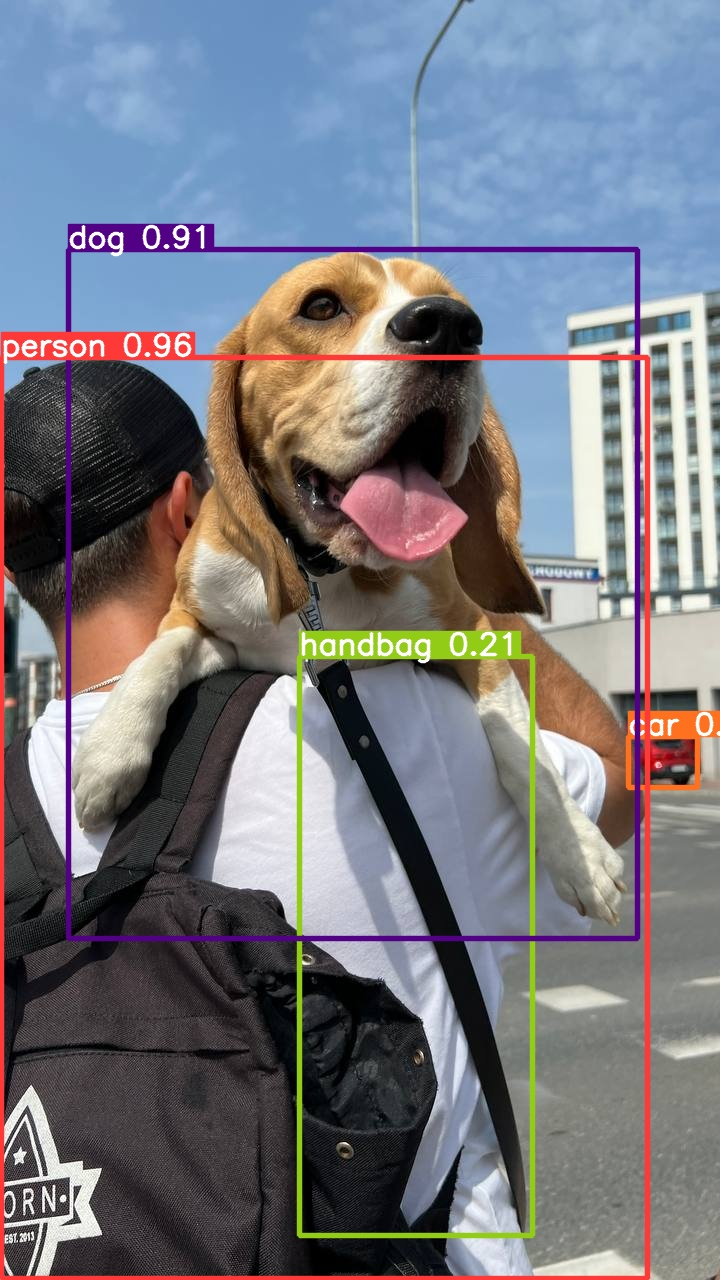

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

## yolov9-e

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 169.6ms
Speed: 0.5ms pre-process, 169.6ms inference, 558.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


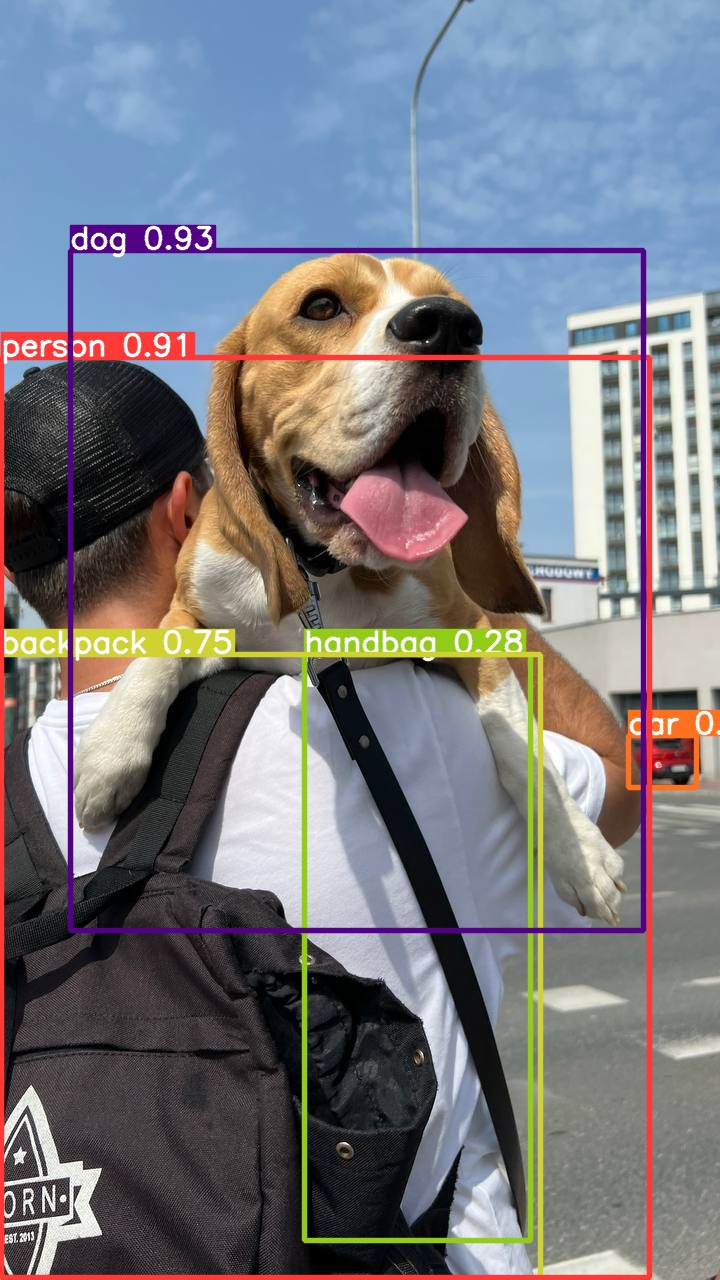

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/dog.jpeg", width=600)

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [ ]:
%cd {HOME}/yolov9

/content/yolov9


**NOTE:** In this tutorial, I will use the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset. Feel free to replace it with your dataset in YOLO format or use another dataset available on [Roboflow Universe](https://universe.roboflow.com). Additionally, if you plan to deploy your model to Roboflow after training, make sure you are the owner of the dataset and that no model is associated with the version of the dataset you are going to training on.

In [ ]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(8)
dataset = version.download("yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-8 in yolov9:: 100%|██████████| 522/522 [00:00<00:00, 2899.55it/s]


## Train Custom Model

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-03-07 08:43:19.030055: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 08:43:19.030129: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 08:43:19.031628: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 08:43:20.124976: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/football-players-detection-8/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    P_curve.png       train_batch2.jpg
events.out.tfevents.1709801000.547eecf4070a.2690.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					    R_curve.png       val_batch0_pred.jpg
hyp.yaml					    results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				    results.png       val_batch1_pred.jpg
labels.jpg					    train_batch0.jpg  weights
opt.yaml					    train_batch1.jpg


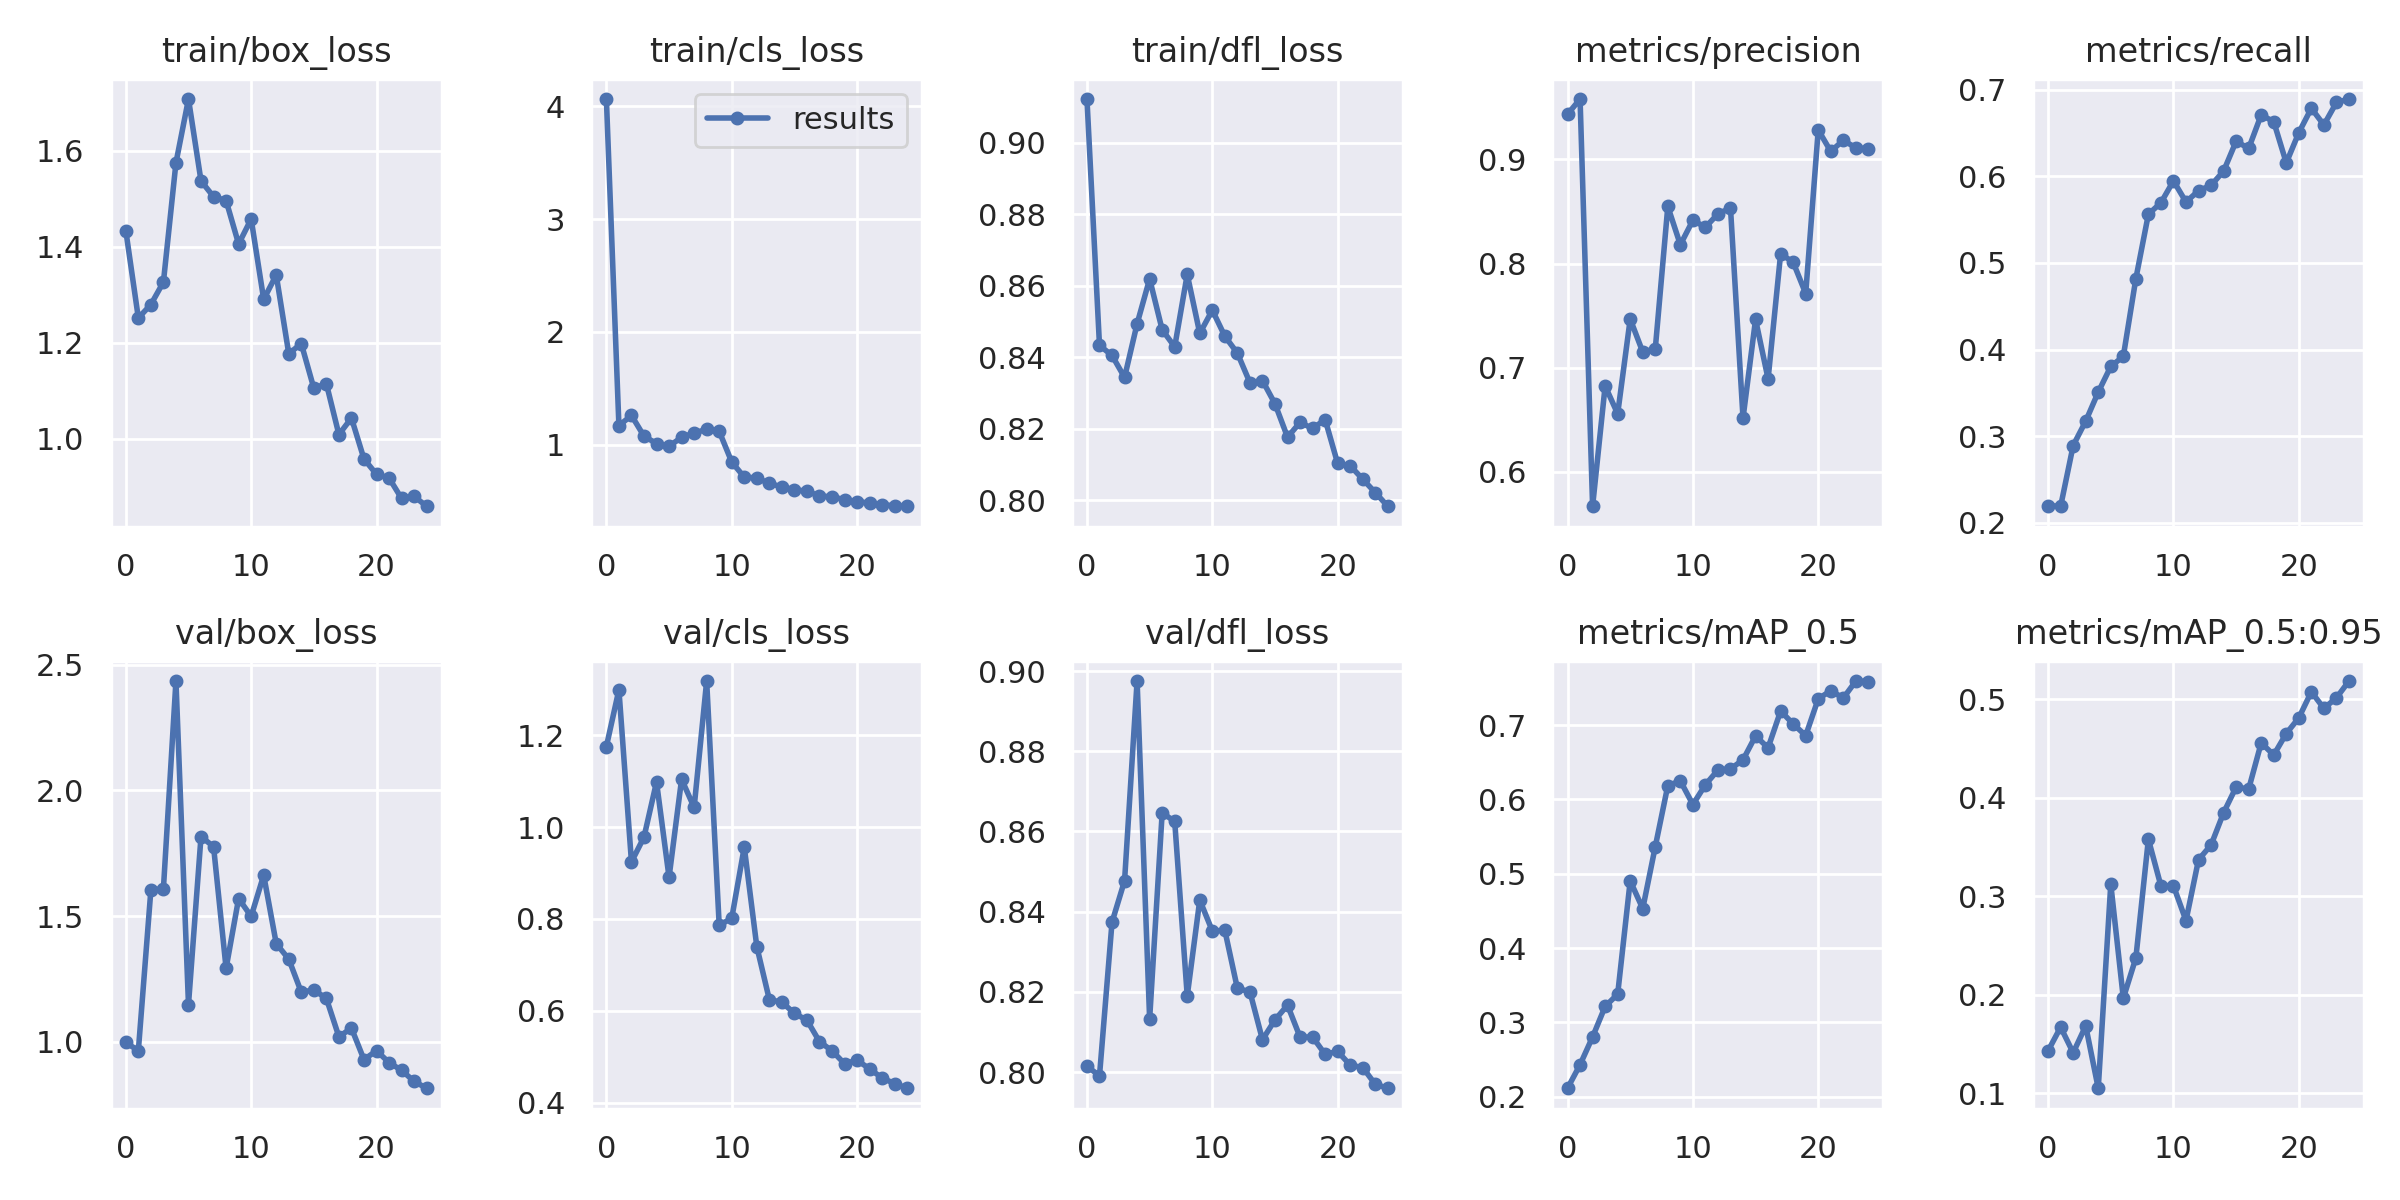

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

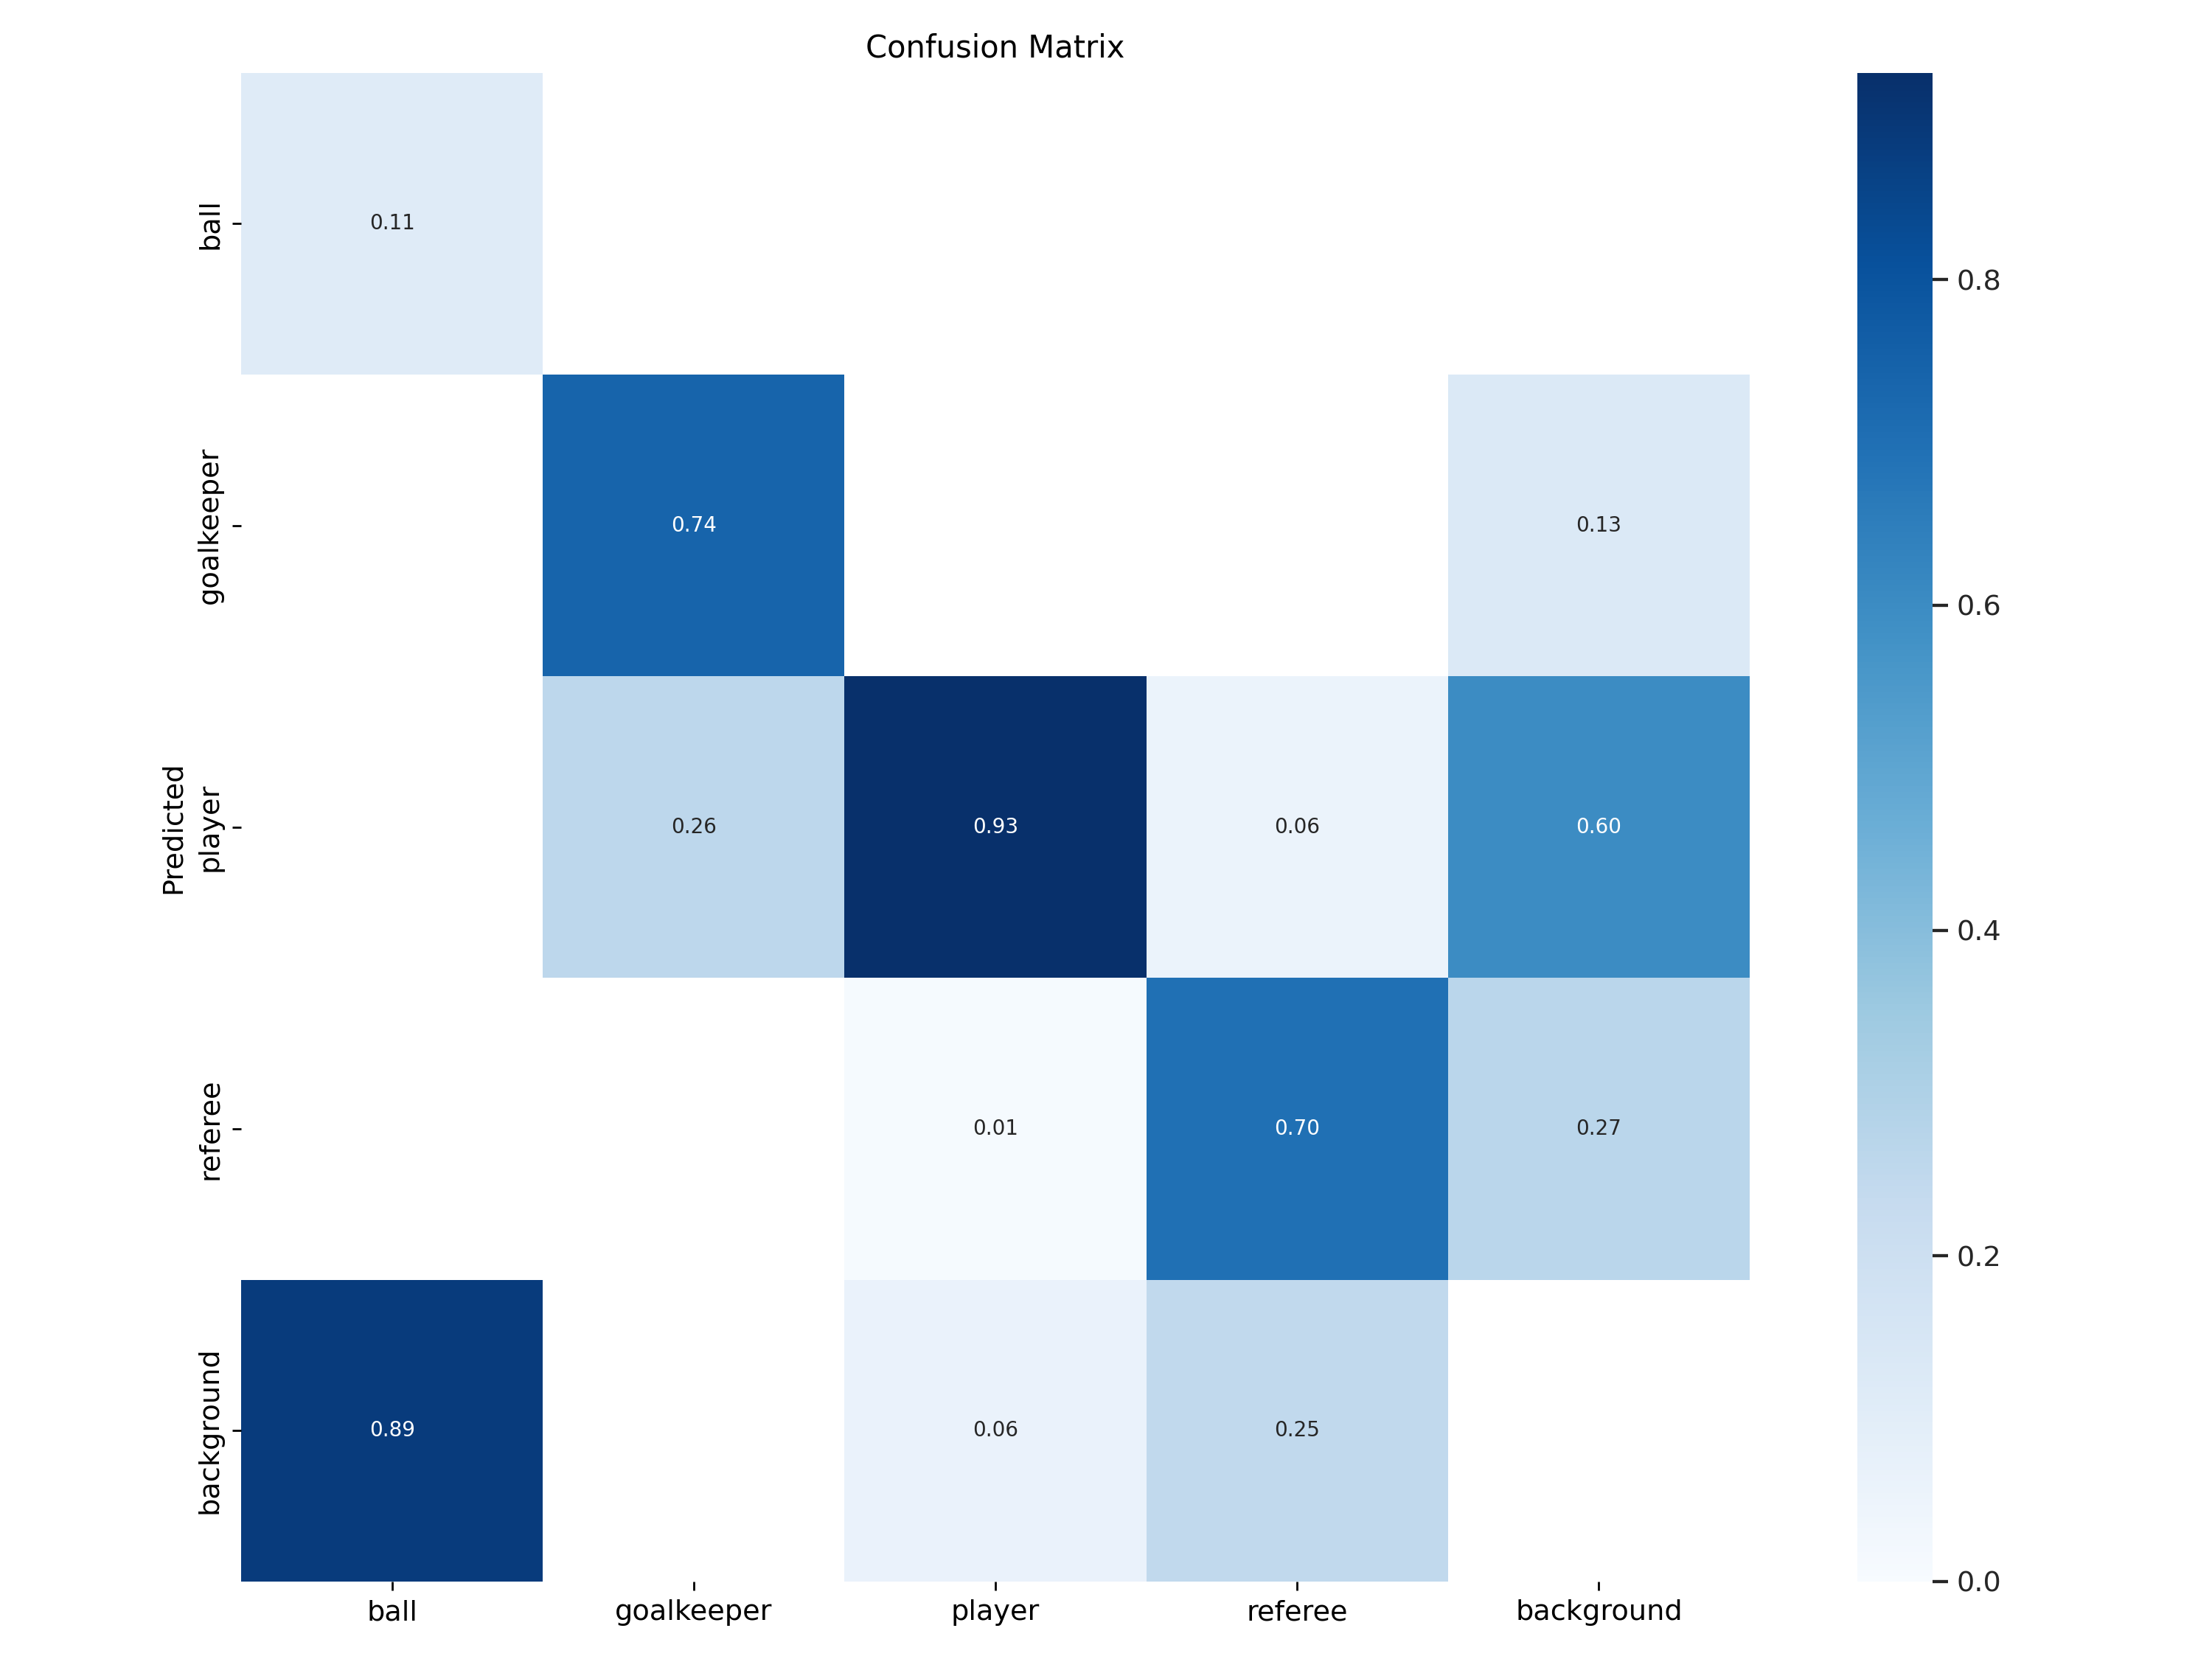

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

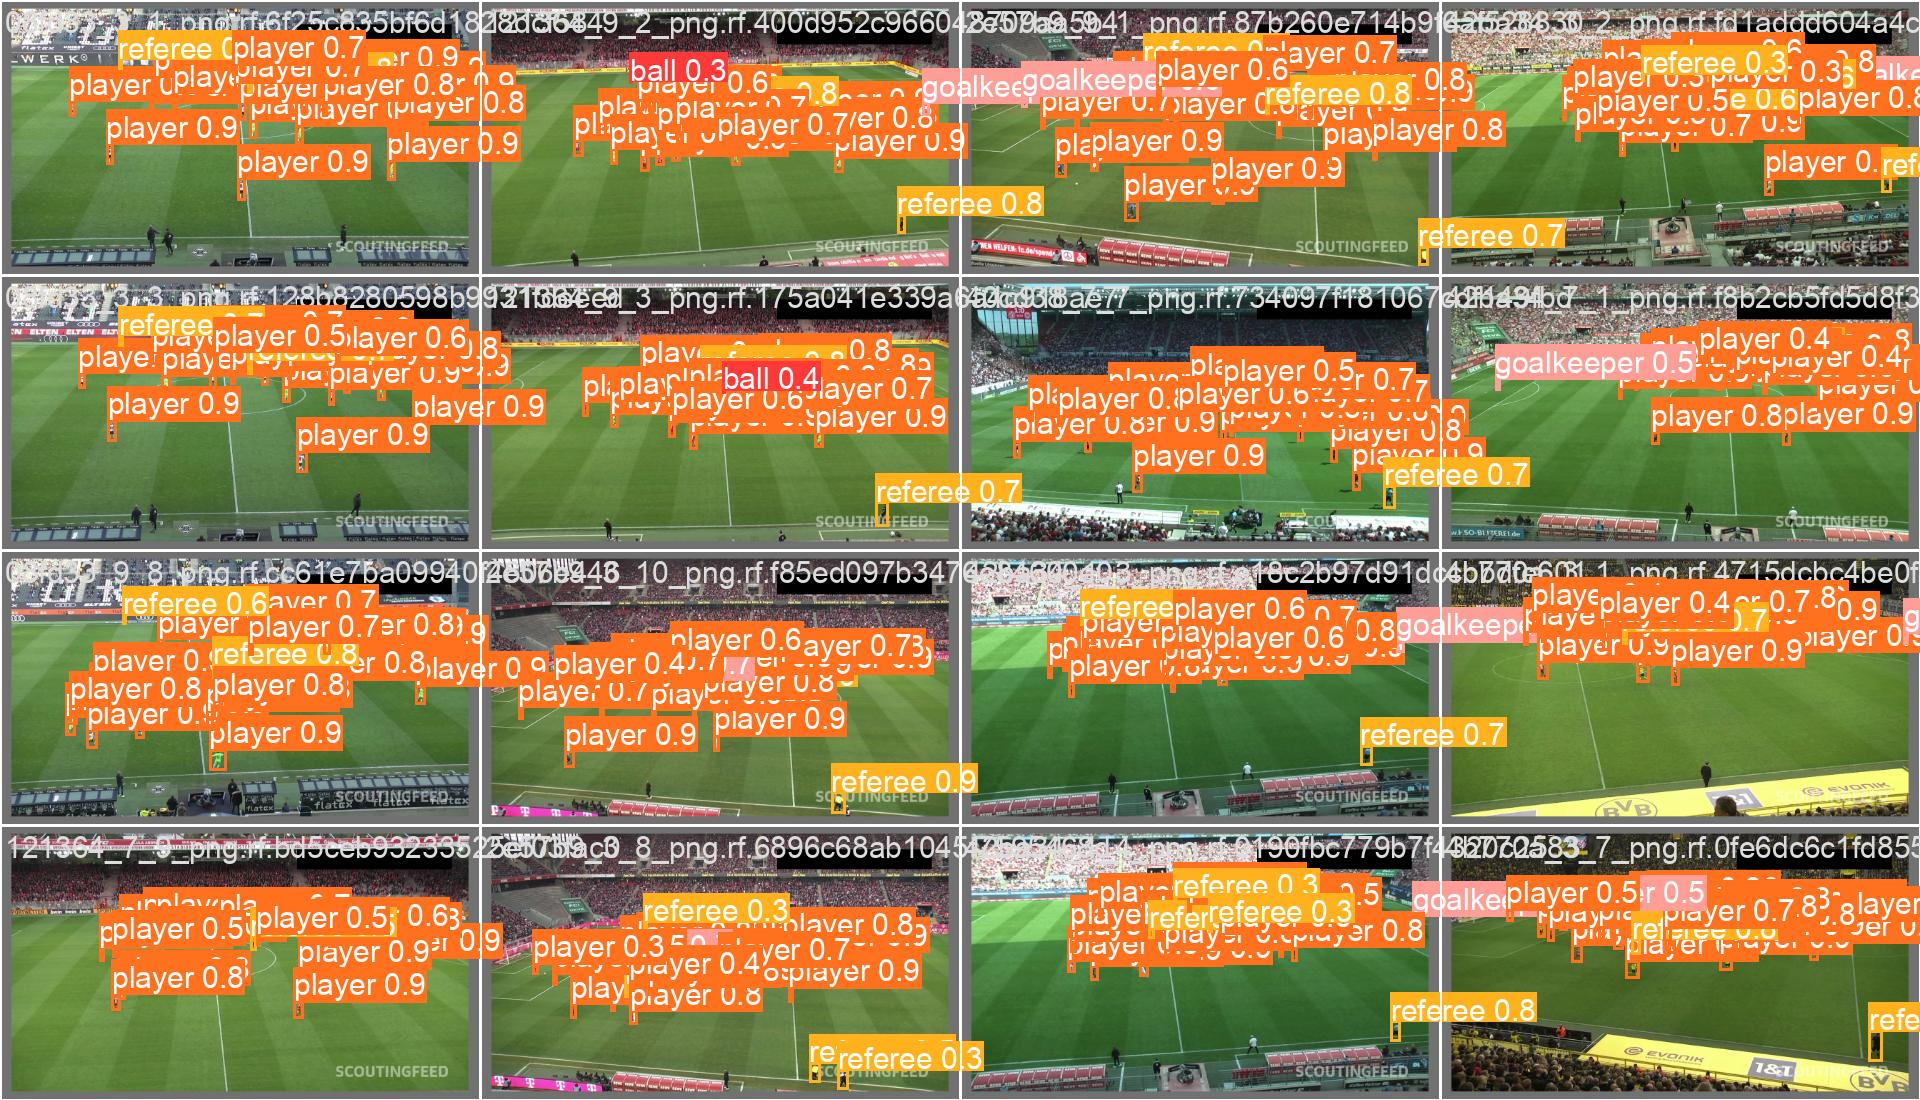

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/football-players-detection-8/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/football-players-detection-8/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:04<00:00,  2.31s/it]
                   all         38        905       0.91      0.689      0.759      0.528
                  ball     

## Inference with Custom Model

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/football-players-detection-8/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
image 1/13 /content/yolov9/football-players-detection-8/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 736x1280 23 players, 107.4ms
image 2/13 /content/yolov9/football-players-detection-8/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 736x1280 1 ball, 2 g

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

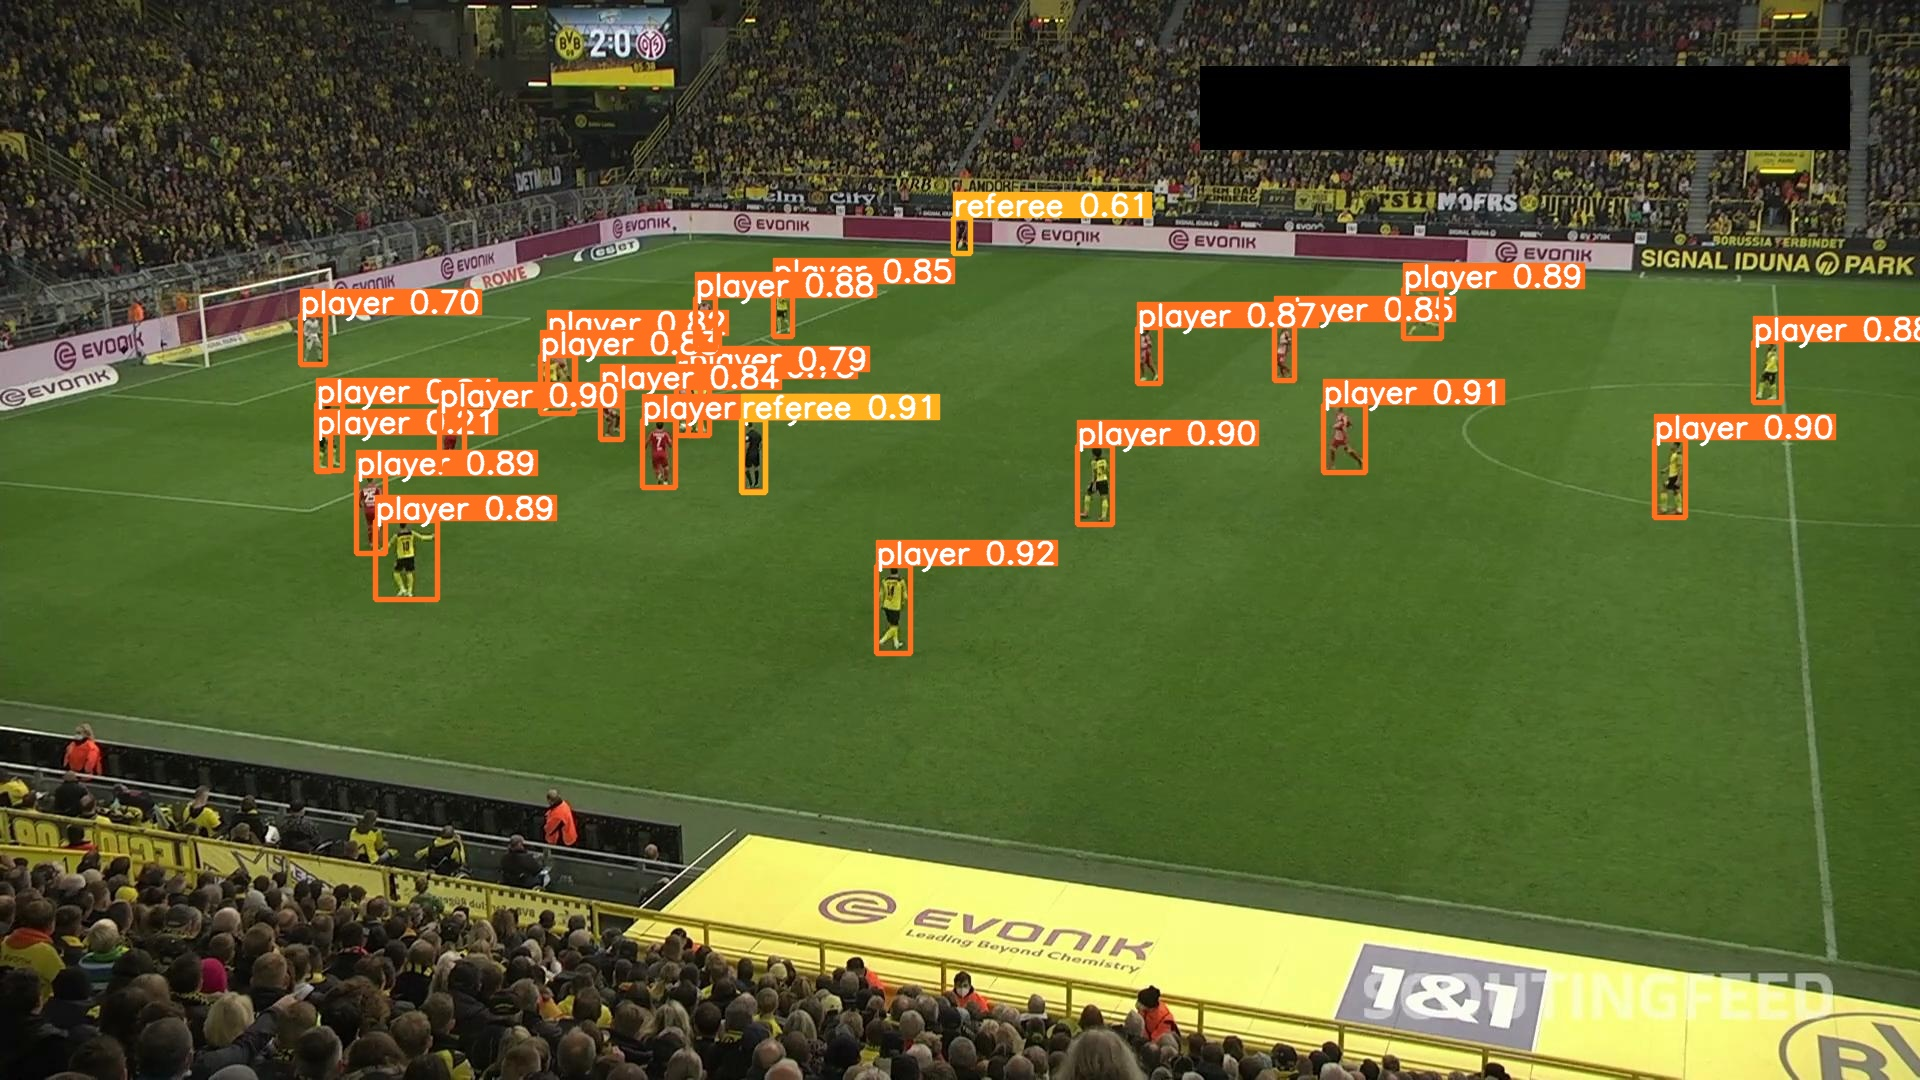

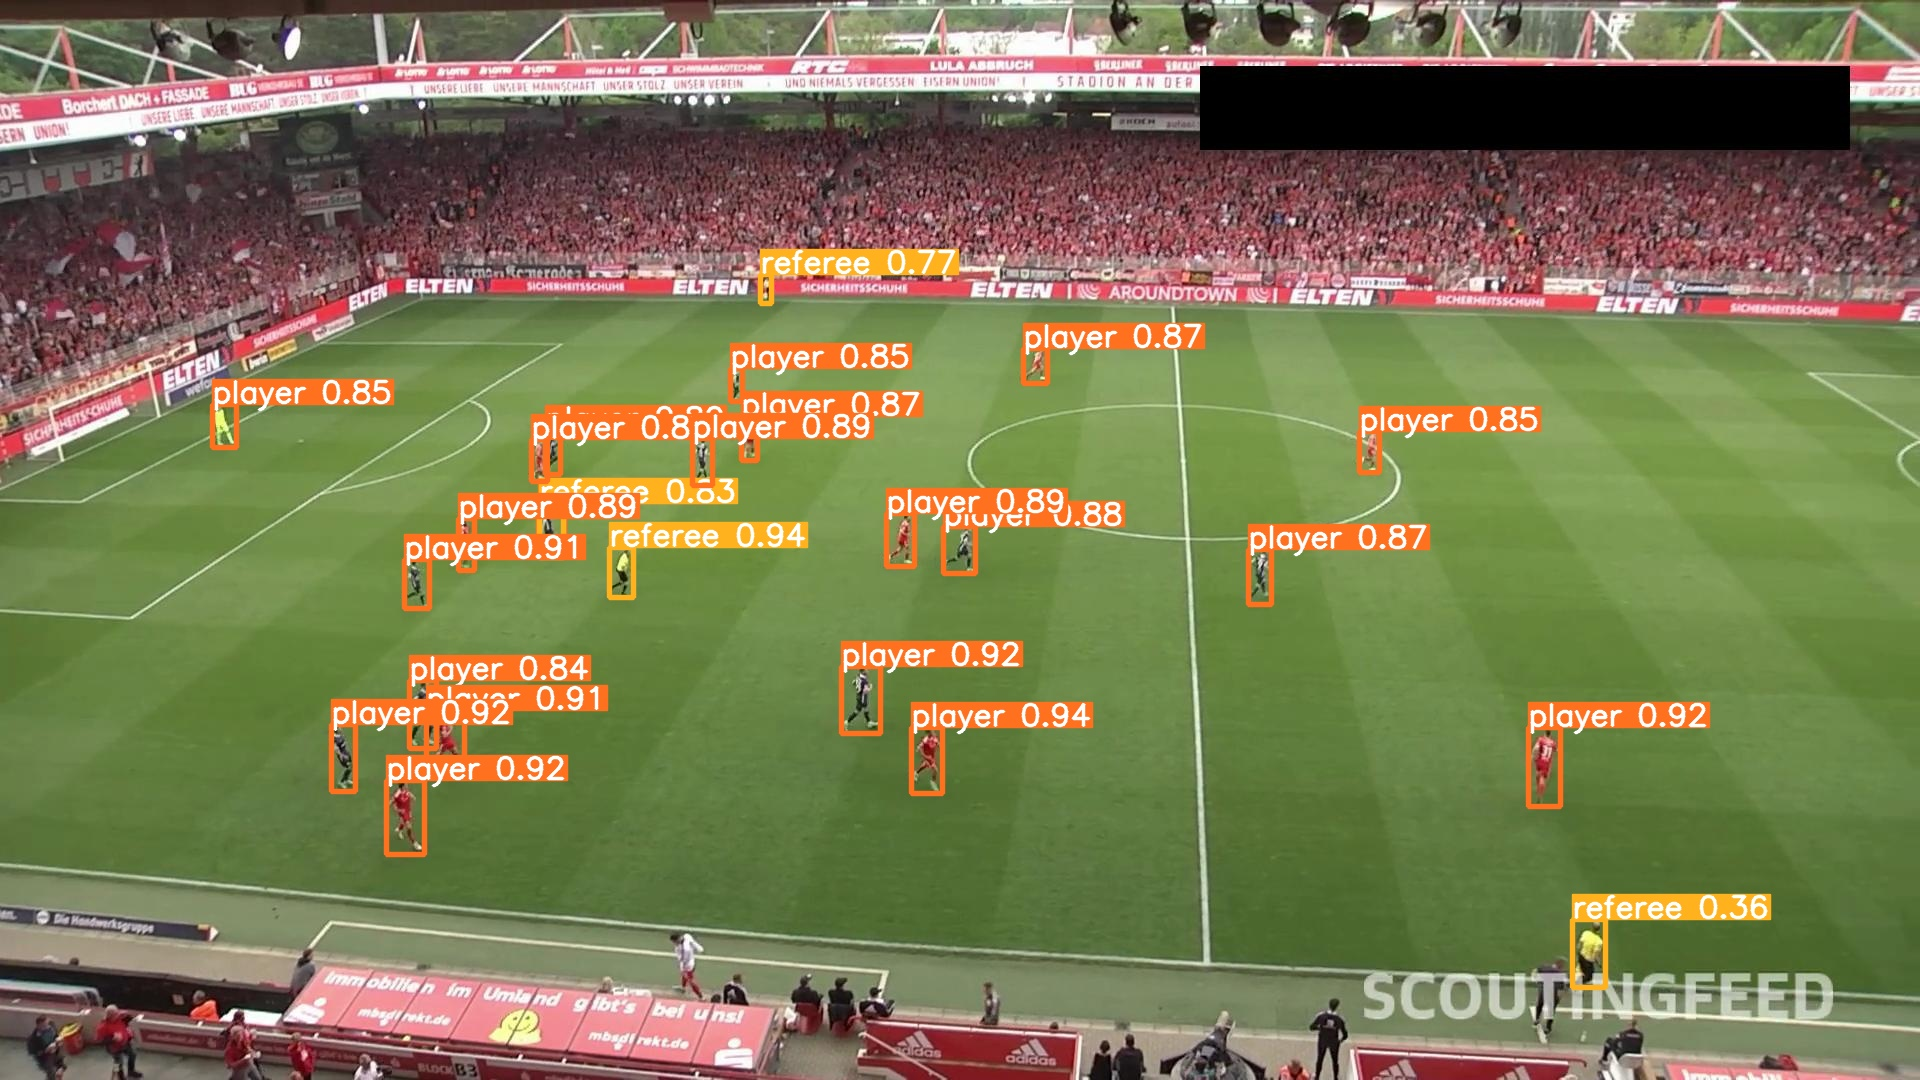

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))